In [28]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import random
from operator import itemgetter
import matplotlib.pyplot as plt
from heapq import nlargest, nsmallest
import operator
from infomap import Infomap

#### 1. Creating a directed graph 

In [29]:
# Creating the directed graph
G = nx.DiGraph()

# Adding edges from the connections.txt file
with open('connections.txt', 'r') as f:
    for line in f:
        node1, node2 = map(int, line.strip().split())
        G.add_edge(node1, node2)

#### 2. Showing which nodes are the bridges

In [30]:
# Converting to undirected graph
G_undirected = G.to_undirected()

# Finding bridges
bridges = list(nx.bridges(G_undirected))
print("These are the bridges in the graph are: ", bridges)

These are the bridges in the graph are:  [(0, 11), (0, 12), (0, 15), (0, 18), (0, 37), (0, 43), (0, 74), (0, 114), (0, 209), (0, 210), (0, 215), (0, 287), (0, 292), (0, 335), (107, 911), (107, 918), (107, 1096), (107, 1119), (107, 1145), (107, 1206), (107, 1386), (107, 1466), (107, 1560), (107, 1581), (107, 1834), (348, 358), (348, 447), (348, 550), (414, 585), (414, 602), (414, 607), (414, 608), (414, 613), (414, 624), (414, 638), (414, 668), (414, 674), (1684, 2842), (1684, 3031), (1684, 3071), (1684, 3183), (1684, 3230), (1912, 2079), (1912, 2195), (1912, 2269), (1912, 2457), (1912, 2470), (1912, 2569), (1912, 2596), (3437, 3451), (3437, 3453), (3437, 3570), (3437, 3650), (3437, 3709), (3437, 3729), (3437, 3748), (3437, 3798), (3437, 3820), (3437, 3853), (3437, 3856), (3437, 3935), (3437, 3974), (3980, 3984), (3980, 4008), (3980, 4010), (3980, 4015), (3980, 4022), (3980, 4024), (3980, 4035), (686, 692), (686, 801), (698, 875), (698, 883), (698, 891), (698, 892)]


#### 3. Showing the density of the graph. Commenting on findings

In [31]:
density = nx.density(G)

print("Density of the graph is: ", density)

Density of the graph is:  0.0054099817517196435


 - The density of the graph, with a value of 0.0054099817517196435, indicates a relatively low level of connectivity among the data points. While a higher density indicates a more interconnected graph with a greater number of edges or relationships between nodes, which is not the case here. 

 - This suggests that the relationships or connections between nodes in the graph are sparse, and individual data points have limited associations with each other. The graph's structure appears to be less densely interconnected, which can potentially lead to distinct clusters or isolated components within the dataset.

#### 4. Showing which nodes have the highest and lowest number of connections.

In [32]:
# Computing the degree for each node
degrees = G.degree()

# Sorting nodes by degree
sorted_nodes_by_degree = sorted(degrees, key=lambda x: x[1], reverse=True)

In [33]:
# Node with the highest number of connections
node_highest_degree = sorted_nodes_by_degree[0]

print(f"Node with highest number of connections: {node_highest_degree}")

Node with highest number of connections: (107, 1045)


In [34]:
# Node with the lowest number of connections

node_lowest_degree = sorted_nodes_by_degree[-1]

print(f"Node with lowest number of connections: {node_lowest_degree}")

Node with lowest number of connections: (4035, 1)


In [35]:
degrees = dict(G.degree)
highest_degrees = nlargest(15, degrees, key = degrees.get)

for i in highest_degrees:
    print(f'Node {i}: Degree {degrees[i]}')

Node 107: Degree 1045
Node 1684: Degree 792
Node 1912: Degree 755
Node 3437: Degree 547
Node 0: Degree 347
Node 2543: Degree 294
Node 2347: Degree 291
Node 1888: Degree 254
Node 1800: Degree 245
Node 1663: Degree 235
Node 1352: Degree 234
Node 2266: Degree 234
Node 483: Degree 231
Node 348: Degree 229
Node 1730: Degree 226


In [36]:
# Nodes with lowest number of connections

# This is an example of connections that have less than 4 nodes
lowest_degrees = [{i:degrees[i]} for i in degrees if degrees[i] < 4]
print(lowest_degrees)

[{11: 1}, {12: 1}, {15: 1}, {18: 1}, {33: 2}, {35: 2}, {37: 1}, {42: 2}, {43: 1}, {47: 2}, {52: 2}, {61: 3}, {70: 2}, {71: 3}, {74: 1}, {76: 3}, {81: 3}, {90: 2}, {97: 3}, {112: 3}, {114: 1}, {138: 2}, {145: 2}, {153: 2}, {154: 2}, {155: 3}, {157: 3}, {160: 2}, {164: 3}, {179: 3}, {182: 3}, {183: 2}, {191: 3}, {205: 2}, {207: 3}, {209: 1}, {210: 1}, {215: 1}, {216: 2}, {228: 3}, {233: 2}, {234: 2}, {240: 3}, {241: 2}, {244: 2}, {247: 3}, {253: 3}, {255: 2}, {256: 2}, {267: 2}, {279: 2}, {282: 2}, {286: 2}, {287: 1}, {292: 1}, {293: 3}, {294: 3}, {301: 3}, {305: 2}, {316: 2}, {321: 3}, {335: 1}, {336: 3}, {2814: 2}, {899: 3}, {904: 3}, {911: 1}, {918: 1}, {1027: 3}, {1034: 3}, {1046: 3}, {1065: 2}, {1071: 3}, {1096: 1}, {1119: 1}, {1145: 1}, {1176: 2}, {1206: 1}, {1208: 3}, {1224: 2}, {1233: 2}, {1252: 3}, {1253: 3}, {1262: 2}, {1270: 2}, {1276: 2}, {1326: 2}, {1353: 3}, {1362: 3}, {1386: 1}, {1394: 2}, {1395: 2}, {1430: 2}, {1466: 1}, {1546: 3}, {1558: 2}, {1560: 1}, {1581: 1}, {1586: 

#### 5. Showing which nodes have the highest incoming and outgoing connections

In [37]:
in_degrees = dict(G.in_degree)
out_degrees = dict(G.out_degree)

highest_IN_degrees = nlargest(15, in_degrees, key = in_degrees.get)
highest_OUT_degrees = nlargest(15, out_degrees, key = out_degrees.get)

In [38]:
print("==========IN DEGREES==========")
for i in highest_IN_degrees:
    print(f'Node {i}: Degree {in_degrees[i]}')

==========IN DEGREES==========
Node 1888: Degree 251
Node 2543: Degree 246
Node 1800: Degree 216
Node 2611: Degree 197
Node 1827: Degree 186
Node 1730: Degree 183
Node 2607: Degree 183
Node 1833: Degree 182
Node 2602: Degree 182
Node 2604: Degree 182
Node 2624: Degree 181
Node 2625: Degree 180
Node 1768: Degree 179
Node 2347: Degree 177
Node 2590: Degree 177


In [39]:
print("==========OUT DEGREES==========")
for i in highest_OUT_degrees:
    print(f'Node {i}: Degree {out_degrees[i]}')

==========OUT DEGREES==========
Node 107: Degree 1043
Node 1684: Degree 778
Node 1912: Degree 748
Node 3437: Degree 542
Node 0: Degree 347
Node 348: Degree 225
Node 1941: Degree 215
Node 1985: Degree 207
Node 483: Degree 191
Node 1917: Degree 189
Node 1943: Degree 187
Node 1938: Degree 185
Node 1983: Degree 185
Node 1946: Degree 183
Node 1993: Degree 183


#### 6. Showing which nodes have the highest closeness, betweenness, and eigenvector | Interpreting the findings

In [40]:
# Calculating closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Node with highest closeness centrality
node_with_highest_closeness = max(closeness_centrality, key=closeness_centrality.get)

print(f"Node with highest closeness centrality: {node_with_highest_closeness}")

Node with highest closeness centrality: 2642


- The node 2642 shows the highest closeness centrality, indicating that it is the most efficiently connected and has the shortest average path length to other nodes in the network. This node plays a crucial role in facilitating information flow within the network, and targeting this individual could help to influence large portion of the network.

In [41]:
# Calculating betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Node with highest betweenness centrality
node_with_highest_betweenness = max(betweenness_centrality, key=betweenness_centrality.get)

print(f"Node with highest betweenness centrality: {node_with_highest_betweenness}")

Node with highest betweenness centrality: 1684


- The node 1684 holds the highest betweenness centrality, thus signaling its critical role as a bridge or mediator in the network, influencing information flow between other nodes. This node serves as a key connector, potentially controlling communication pathways within the network and targeting this individual can be a good strategy.

In [42]:
# Calculating eigenvector centralities for in and out edges
eigenvector_in = nx.eigenvector_centrality(G, max_iter=400)
eigenvector_out = nx.eigenvector_centrality(G.reverse(), max_iter=400)

# Calculating eigenvector centralities for each node
eigenvector = {}
for key in eigenvector_in.keys():
    eigenvector[key] = (eigenvector_in[key] + eigenvector_out[key])/2
    
# top 15 nodes with higest eigenvector
e_vec = nlargest(15, eigenvector, key=eigenvector.get)
for i in e_vec:
    print(f'Node {i}: Eigenvector {eigenvector[i]}')

Node 0: Eigenvector 0.4419361459191112
Node 2655: Eigenvector 0.4013521498353261
Node 2654: Eigenvector 0.23993423112534543
Node 3: Eigenvector 0.14863178689048834
Node 9: Eigenvector 0.12565044899639224
Node 2646: Eigenvector 0.11377629041020572
Node 13: Eigenvector 0.0907191228782389
Node 2638: Eigenvector 0.08909843274277293
Node 2631: Eigenvector 0.08346591284941768
Node 21: Eigenvector 0.07700765665617419
Node 2630: Eigenvector 0.047391530121004125
Node 25: Eigenvector 0.03938339991724912
Node 2625: Eigenvector 0.029557145241083632
Node 26: Eigenvector 0.026701918680156034
Node 2624: Eigenvector 0.01660962375375174


- Node 0 has the highest eigenvector centrality in the network, with a value of 0.44193614591911123, indicating its influence is not only based on direct connections but also on connections with other highly influential nodes. This suggests that Node 0 plays a crucial role in the network, as its connections extend to other nodes with significant importance.

#### 7. Implementing a community detection algorithm on the directed graph and showing how many communities were created.

In [43]:
def FindingCommunities(G):
    im = Infomap("--two-level --directed")
    print("Building Infomap network from a NetworkX graph...")
    
    for e in G.edges():
        im.addLink(*e)
        
    print("Finding communities with Infomap...")
    im.run();
    print("Found {0} communities with codelength: {1}".format(im.num_top_modules,
    im.codelength))
    communities = {}
    
    for node in im.tree:
        communities[node.node_id] = node.module_id
        
    nx.set_node_attributes(G, communities,'community')
    return im.num_top_modules

In [44]:

print(FindingCommunities(G))

Building Infomap network from a NetworkX graph...


Finding communities with Infomap...
Found 96 communities with codelength: 6.58817364825253
96


- As we see, we found existing 96 communities

#### 8. Showing the largest and the smallest community. | Interpreting the findings

In [46]:
# Creating a dict of nodes and their corresponding communities
nodes_comm = dict((n, d["community"]) for n, d in G.nodes().items())

# Creating a list of all communities (they are repeating cases)
comms = np.array(list(nodes_comm.values()))

# To eliminate repetitions selecting unique communities
distinct_comms = np.unique(comms)

# Dictionary for each community and the number of nodes in it
comm_count = {}

#Filling above dictionary
for com in distinct_comms:
    count = np.count_nonzero(comms == com)
    comm_count[com] = count
   

maximum = max(comm_count, key=comm_count.get)
minimum = min(comm_count, key=comm_count.get)

print(f"Largest Community:  {maximum}, {comm_count[maximum]} ")
print(f"Smallest Community: {minimum}, {comm_count[minimum]} ")

Largest Community:  5, 437 
Smallest Community: 36, 2 


In [47]:
largest5_com = nlargest(5, comm_count, key=comm_count.get)
for i in largest5_com:
    print(f'Community {i} with {comm_count[i]} nodes')

Community 5 with 437 nodes
Community 2 with 347 nodes
Community 3 with 271 nodes
Community 1 with 236 nodes
Community 6 with 226 nodes


In [49]:
smallest5_com = nsmallest(5, comm_count, key=comm_count.get)
for i in smallest5_com:
    print(f'Community {i} with {comm_count[i]} nodes')

Community 36 with 2 nodes
Community 70 with 2 nodes
Community 84 with 2 nodes
Community 85 with 2 nodes
Community 87 with 2 nodes


#### 9. Selecting the largest three communities and drawing them. After doing so, removing the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each should be in a separate plot/draw.

We see from above exercise that these three communities are the largest, so let's select them :
- Community 5 with 437 nodes
- Community 2 with 347 nodes
- Community 3 with 271 nodes

In [50]:
selected_data5 = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 5)
selected_data3 = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 3)
selected_data2 = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 2)


sg5 = G.subgraph(list(selected_data5.keys()))
sg3 = G.subgraph(list(selected_data3.keys()))
sg2= G.subgraph(list(selected_data2.keys()))

In [51]:
# Keeping graphs of three largest communities in a list
graphs = [sg5, sg3, sg2]

options = {
    "with_labels": False,
    "node_size": 100,
    "node_color": "pink",  
    "edgecolors": "black",
    "linewidths": 0.7,
    "width": 0.35,
}

# Function for plotting graphs
def plot_graphs(graphs):
    for g in graphs:
        plt.figure(figsize=(12, 12))
        nx.draw_networkx(g, **options)
    plt.show()


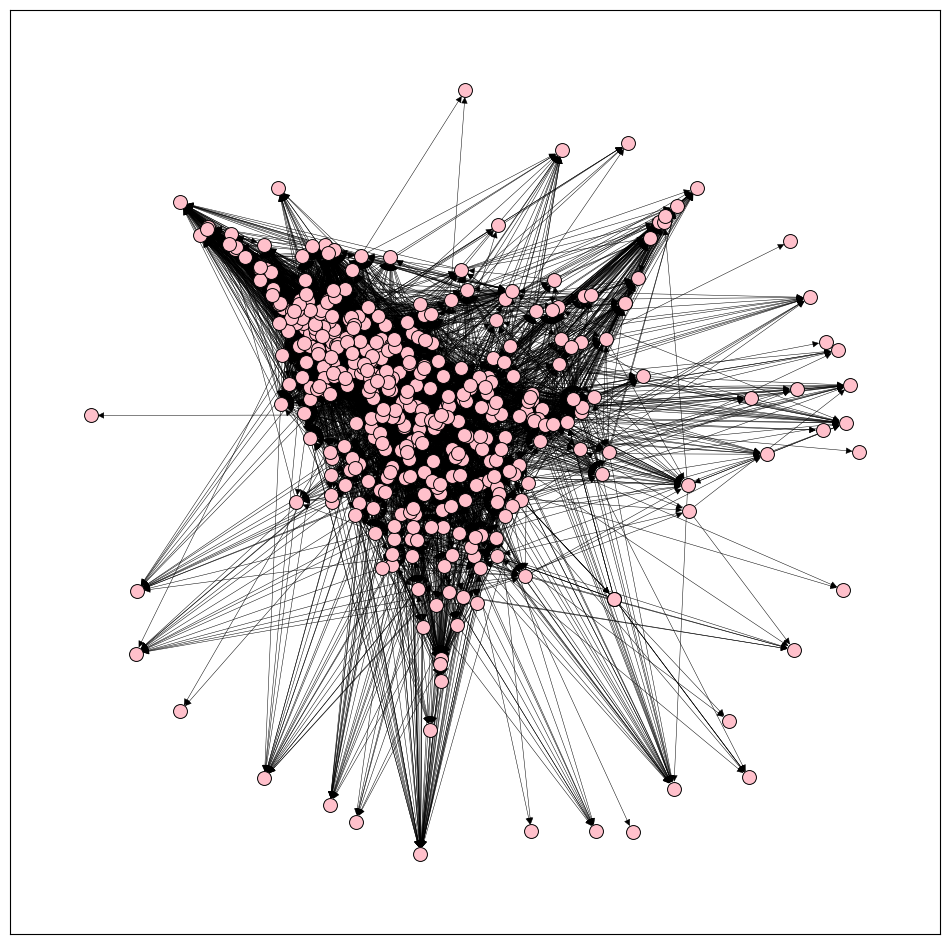

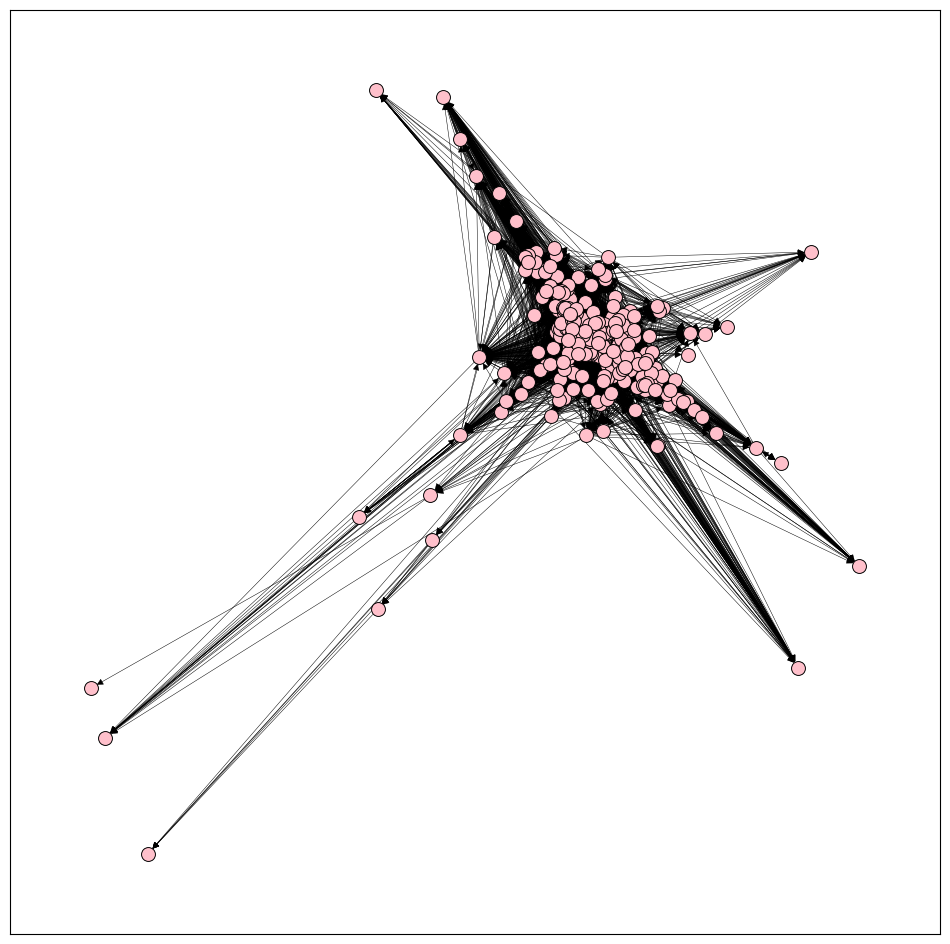

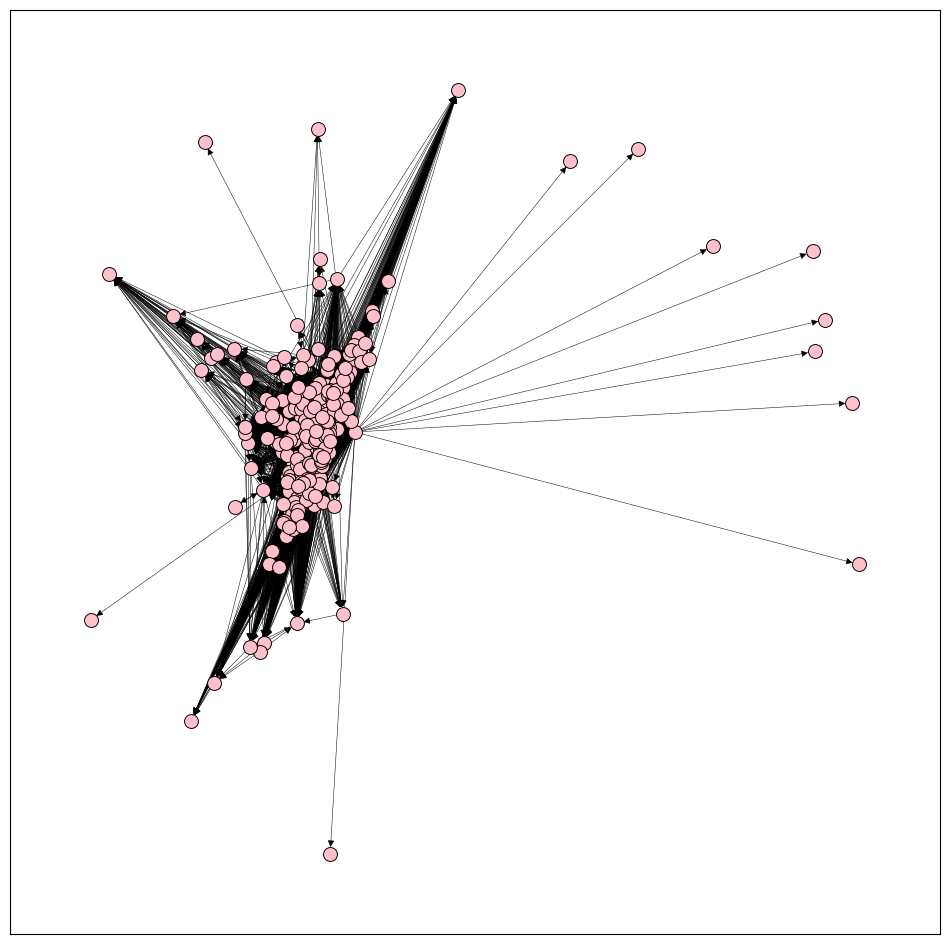

In [52]:
plot_graphs(graphs)

In [56]:
def topN(graph, n, centrality_measure, **kwargs):
    measures = centrality_measure(graph, **kwargs)
    word = centrality_measure.__name__.split("_")[0].capitalize()

    top_nodes = nlargest(n, measures, key=measures.get)

    for i in top_nodes:
        print(f'Node {i}: {word} Centrality {measures[i]}')
    print("\n")
    return top_nodes

# Degree centralities
sg5_deg = topN(sg5, 3, nx.degree_centrality)
sg3_deg = topN(sg3, 3, nx.degree_centrality)
sg2_deg = topN(sg2, 3, nx.degree_centrality)

# Closeness centralities
sg5_close = topN(sg5, 3, nx.closeness_centrality)
sg3_close = topN(sg3, 3, nx.closeness_centrality)
sg2_close = topN(sg2, 3, nx.closeness_centrality)


Node 1684: Degree Centrality 1.0
Node 3101: Degree Centrality 0.27522935779816515
Node 3291: Degree Centrality 0.2729357798165138


Node 2111: Degree Centrality 0.674074074074074
Node 2384: Degree Centrality 0.674074074074074
Node 2047: Degree Centrality 0.625925925925926


Node 107: Degree Centrality 1.0
Node 1800: Degree Centrality 0.653179190751445
Node 1663: Degree Centrality 0.6445086705202312


Node 3434: Closeness Centrality 0.47283286285579856
Node 3397: Closeness Centrality 0.4690416474160121
Node 3406: Closeness Centrality 0.43244557911370013


Node 2598: Closeness Centrality 0.6383228926255633
Node 2649: Closeness Centrality 0.615820868945869
Node 2642: Closeness Centrality 0.6059710930442638


Node 1800: Closeness Centrality 0.6651088427007747
Node 1827: Closeness Centrality 0.6404437814655977
Node 1833: Closeness Centrality 0.6322040925831078




In [57]:
# Betweenness centralities
sg5_between = topN(sg5, 3, nx.betweenness_centrality)
sg3_between = topN(sg3, 3, nx.betweenness_centrality)
sg2_between = topN(sg2, 3, nx.betweenness_centrality)

# Eigenvector centralities
sg5_eigen = topN(sg5, 3, nx.eigenvector_centrality, max_iter=1000)
sg3_eigen = topN(sg3, 3, nx.eigenvector_centrality, max_iter=1000)
sg2_eigen = topN(sg2, 3, nx.eigenvector_centrality, max_iter=1000)

Node 2951: Betweenness Centrality 0.013113163985381975
Node 3154: Betweenness Centrality 0.01116985131870386
Node 3101: Betweenness Centrality 0.010348179645559718


Node 2289: Betweenness Centrality 0.01679094611163723
Node 2384: Betweenness Centrality 0.013602408613304222
Node 2133: Betweenness Centrality 0.012552938382275437


Node 1352: Betweenness Centrality 0.008775674970118878
Node 1471: Betweenness Centrality 0.0067314409609612645
Node 1431: Betweenness Centrality 0.00633838109292521


Node 3434: Eigenvector Centrality 0.9942111049756307
Node 3422: Eigenvector Centrality 0.07924740367681171
Node 3419: Eigenvector Centrality 0.04183309034589207


Node 2649: Eigenvector Centrality 0.9888867361388998
Node 2643: Eigenvector Centrality 0.10604941494202987
Node 2653: Eigenvector Centrality 0.10327337019872326


Node 1900: Eigenvector Centrality 0.986016697813736
Node 1868: Eigenvector Centrality 0.1643039640571094
Node 1842: Eigenvector Centrality 0.027124455051260873




In [59]:
# Top degree - red, rest pink
color_deg_sg5 = ["red" if node in sg5_deg else "pink" for node in sg5.nodes]
color_deg_sg3 = ["red" if node in sg3_deg else "pink" for node in sg3.nodes]
color_deg_sg2 = ["red" if node in sg2_deg else "pink" for node in sg2.nodes]

# Top closeness - red, rest pink
color_close_sg5 = ["red" if node in sg5_close else "pink" for node in sg5.nodes]
color_close_sg3 = ["red" if node in sg3_close else "pink" for node in sg3.nodes]
color_close_sg2 = ["red" if node in sg2_close else "pink" for node in sg2.nodes]

# Top betweenness - red, rest pink
color_between_sg5 = ["red" if node in sg5_between else "pink" for node in sg5.nodes]
color_between_sg3 = ["red" if node in sg3_between else "pink" for node in sg3.nodes]
color_between_sg2 = ["red" if node in sg2_between else "pink" for node in sg2.nodes]

# Top eigenvector - red, rest pink
color_eigen_sg5 = ["red" if node in sg5_eigen else "pink" for node in sg5.nodes]
color_eigen_sg3 = ["red" if node in sg3_eigen else "pink" for node in sg3.nodes]
color_eigen_sg2 = ["red" if node in sg2_eigen else "pink" for node in sg2.nodes]

def plot_function(graph_list, color_list):
   
    for g, col in zip(graph_list, color_list):
        options = {
            "with_labels": False,
            "node_size": 100,
            "node_color": col,
            "edgecolors": "black",
            "linewidths": 0.7,
            "width": 0.35,
        }
       
        plt.figure(figsize=(12, 12))
        nx.draw_networkx(g, **options)
    plt.show()

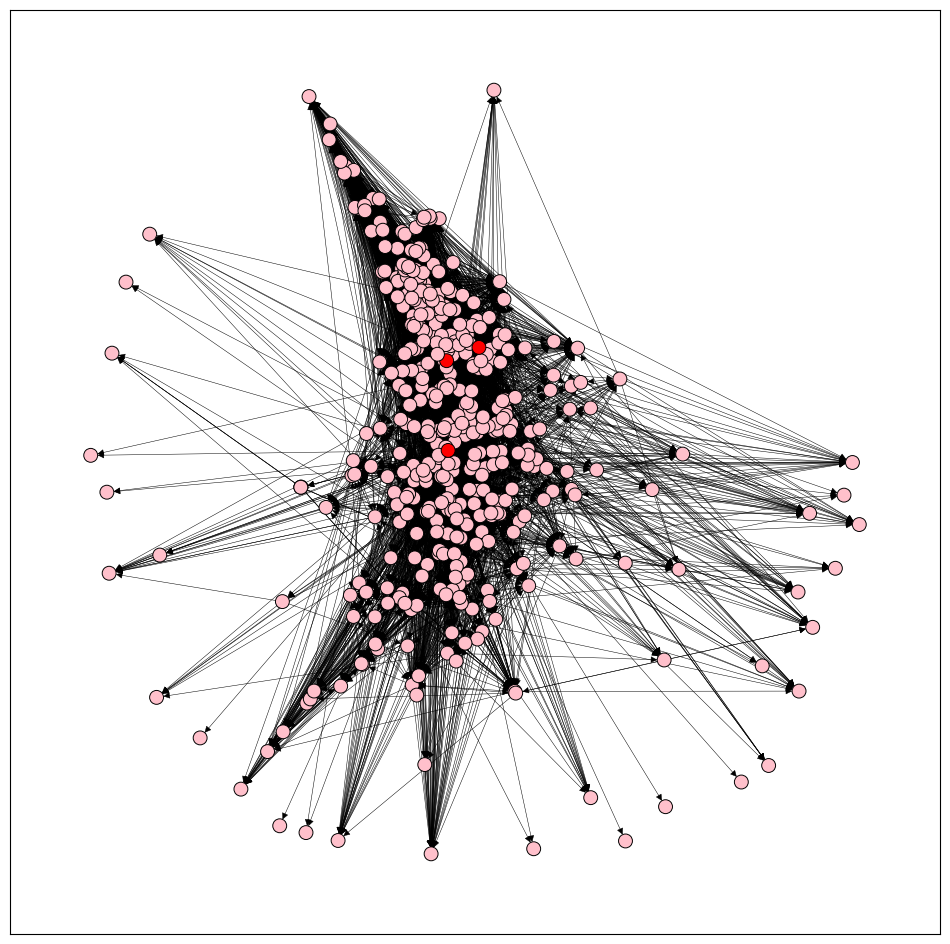

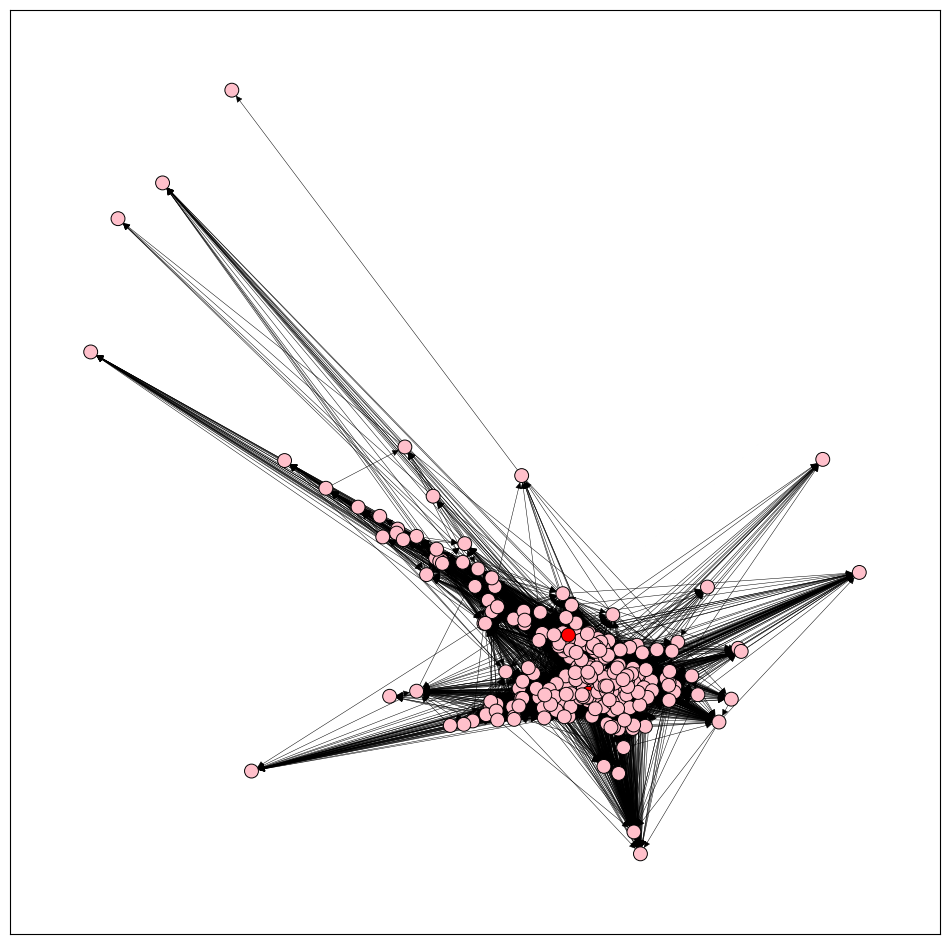

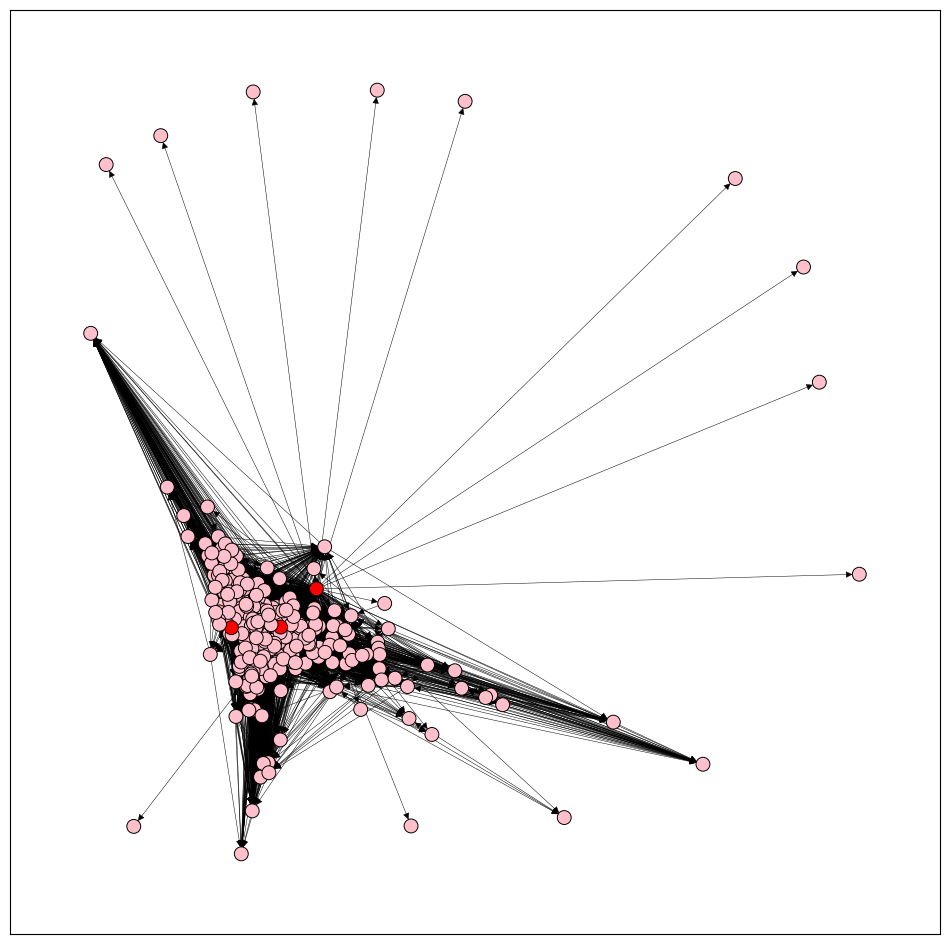

In [60]:
plot_function(graphs, [color_deg_sg5, color_deg_sg3, color_deg_sg2])

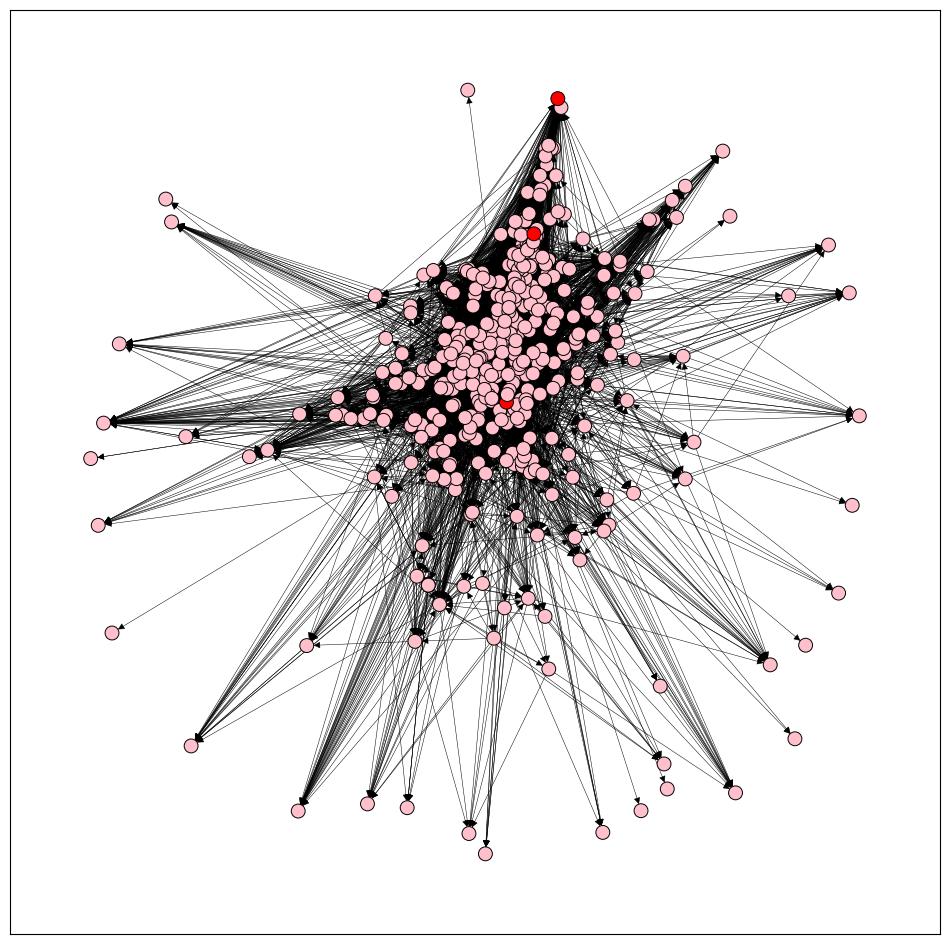

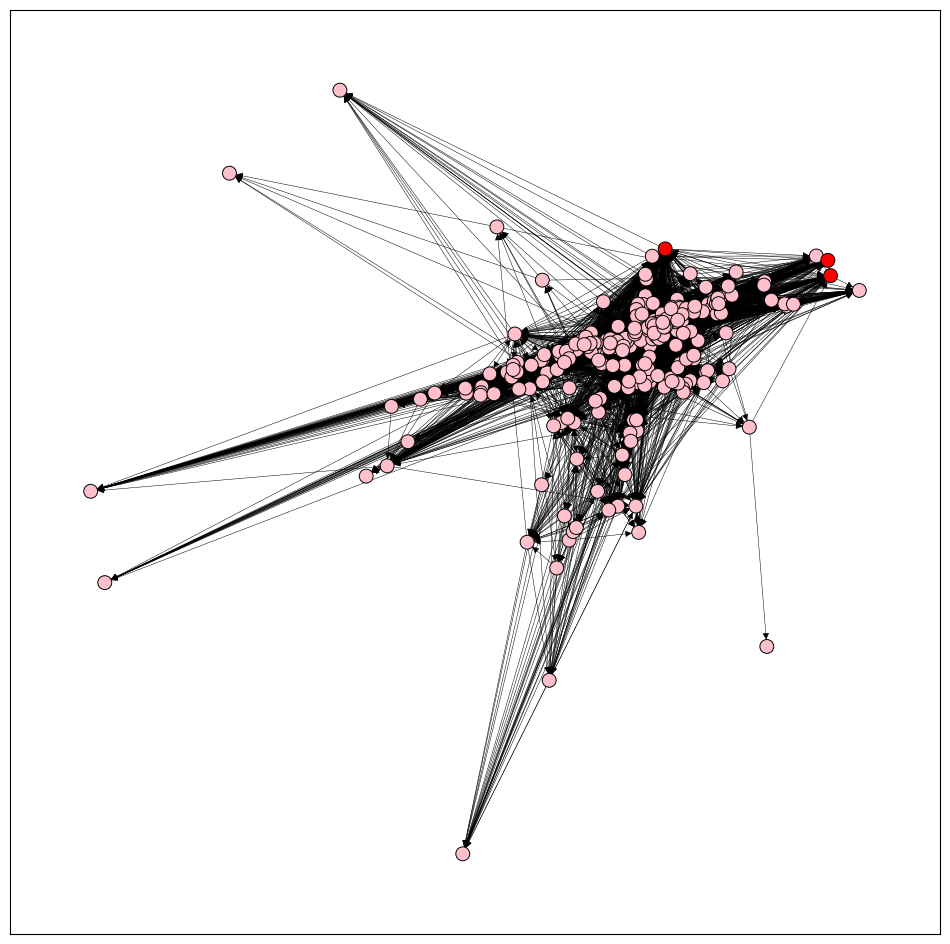

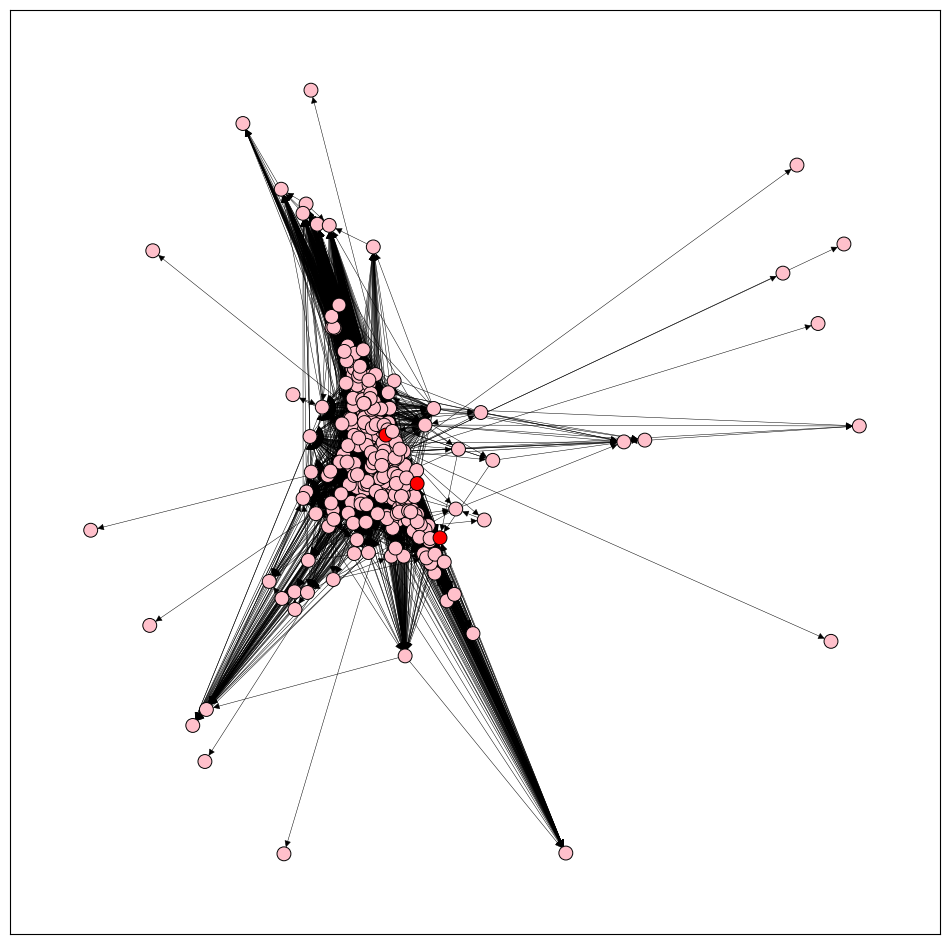

In [61]:
plot_function(graphs, [color_close_sg5, color_close_sg3, color_close_sg2])

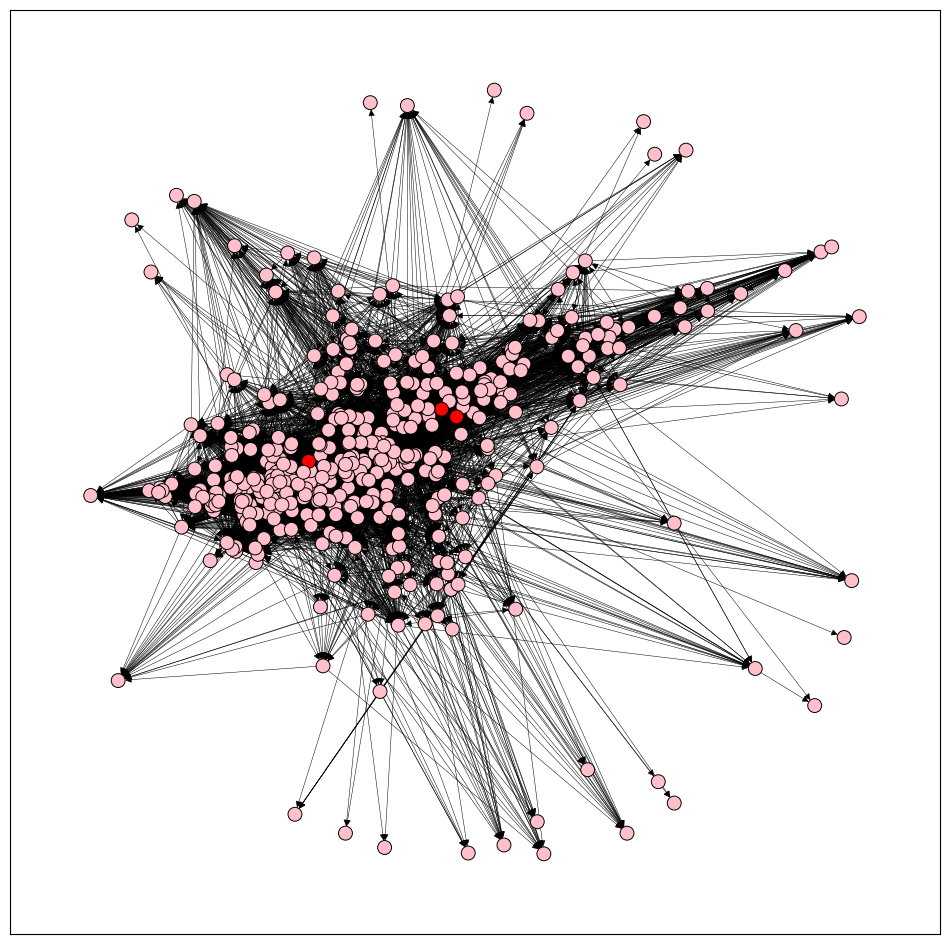

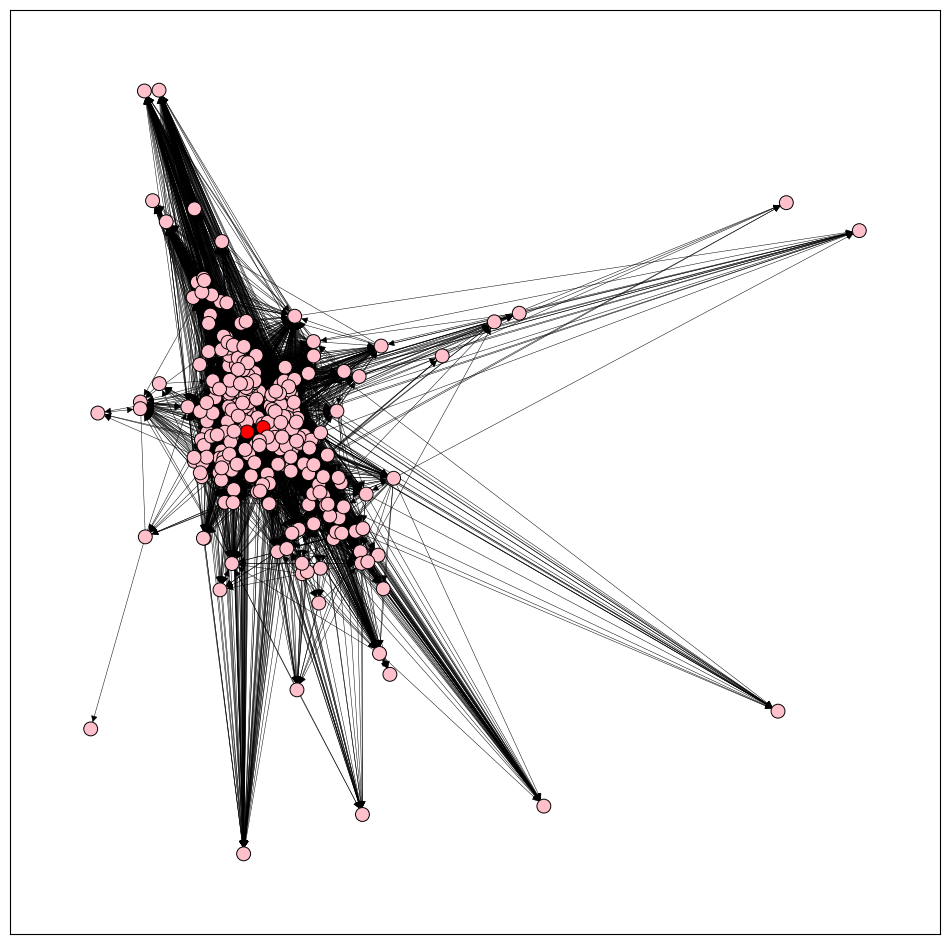

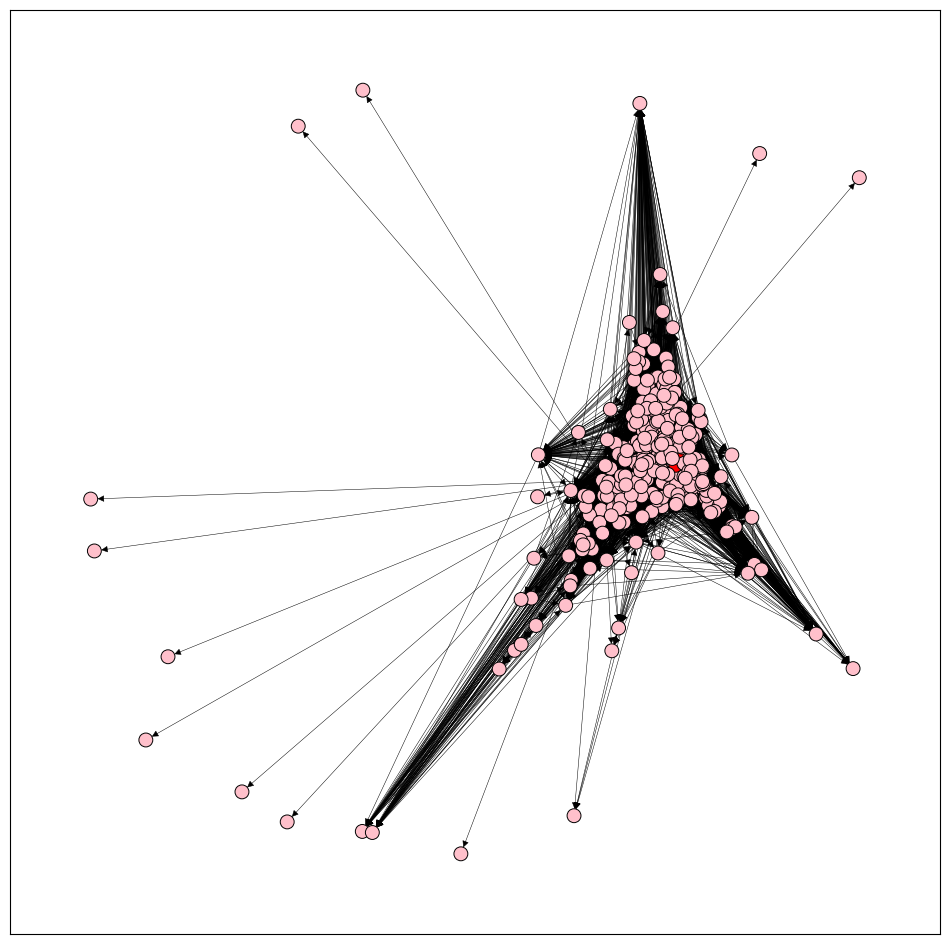

In [62]:
plot_function(graphs, [color_between_sg5, color_between_sg3, color_between_sg2])

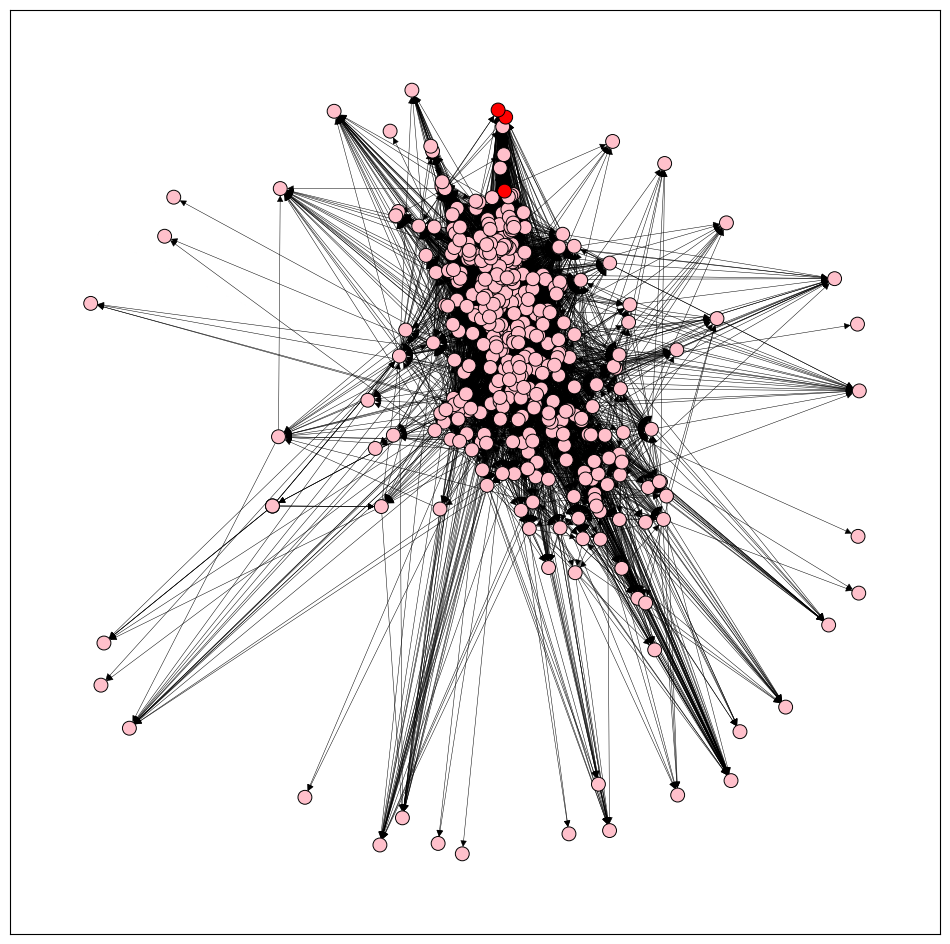

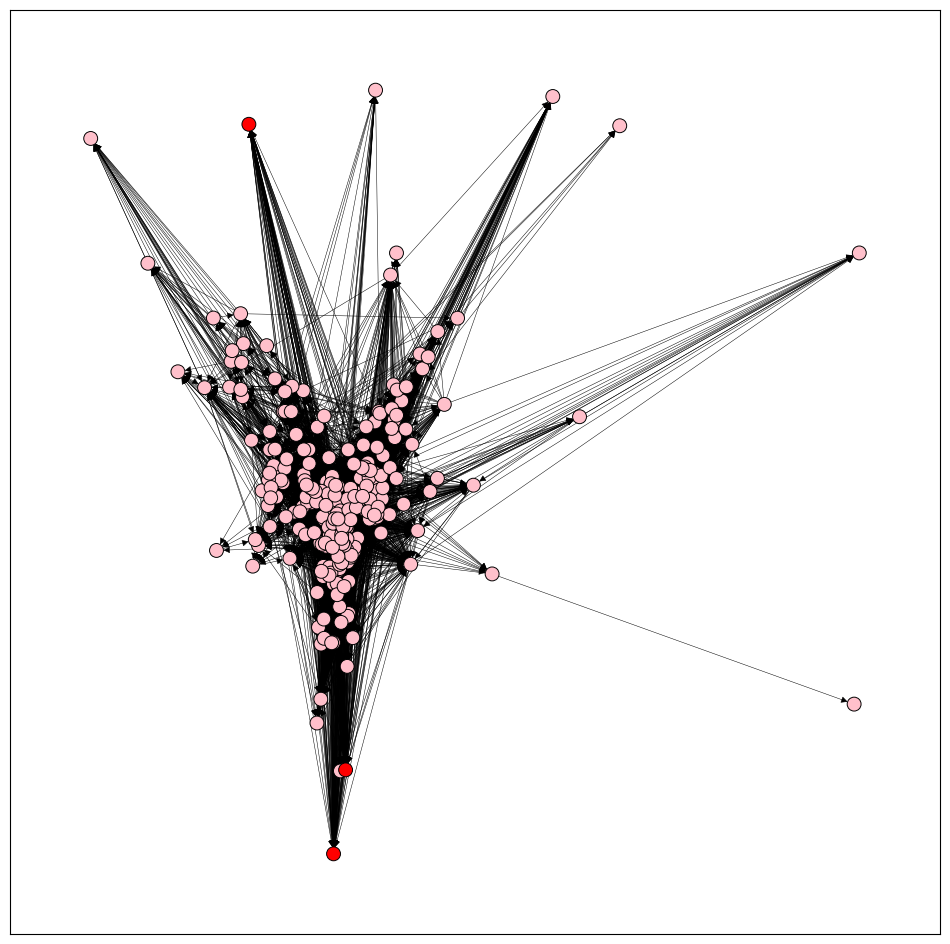

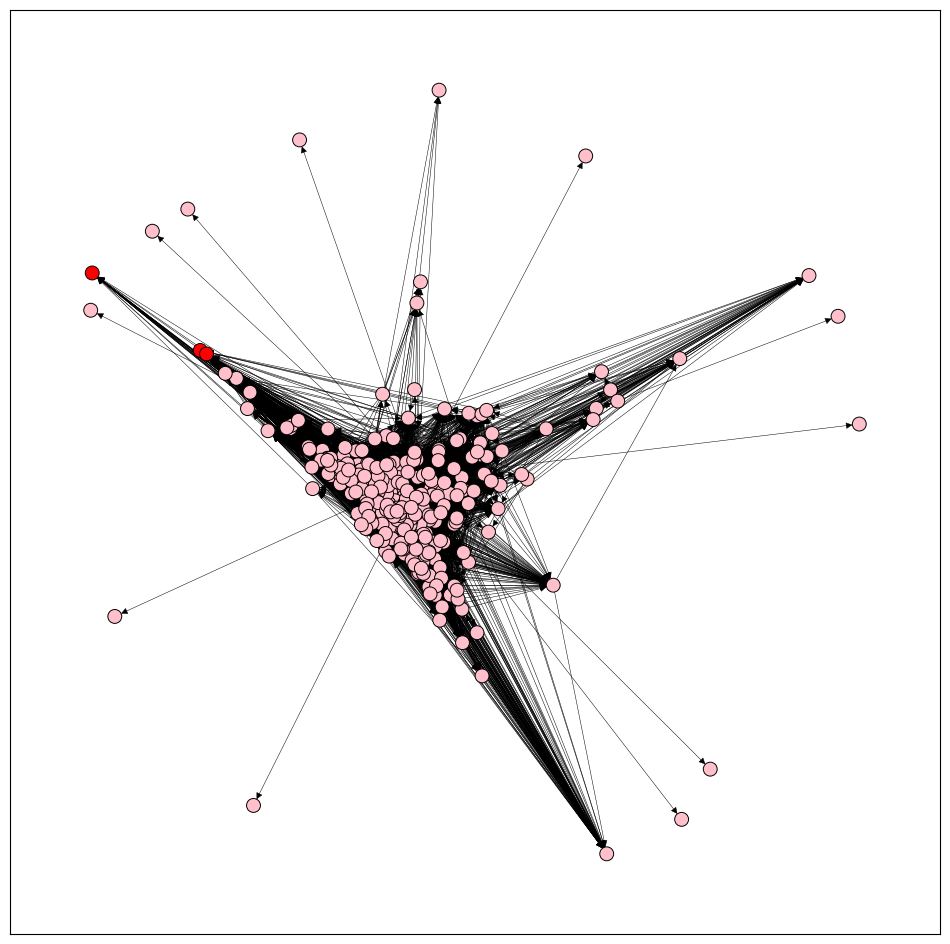

In [63]:
plot_function(graphs, [color_eigen_sg5, color_eigen_sg3, color_eigen_sg2])

#### 10. Drawing the influencers of those top 3 communities.

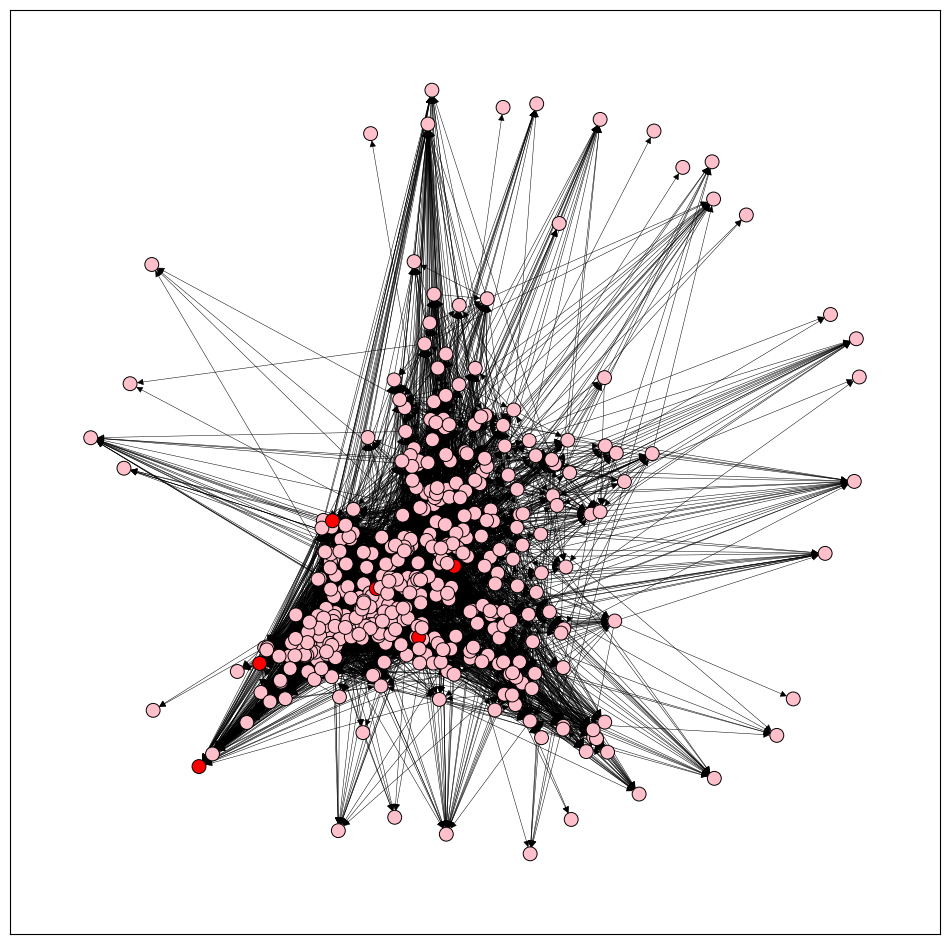

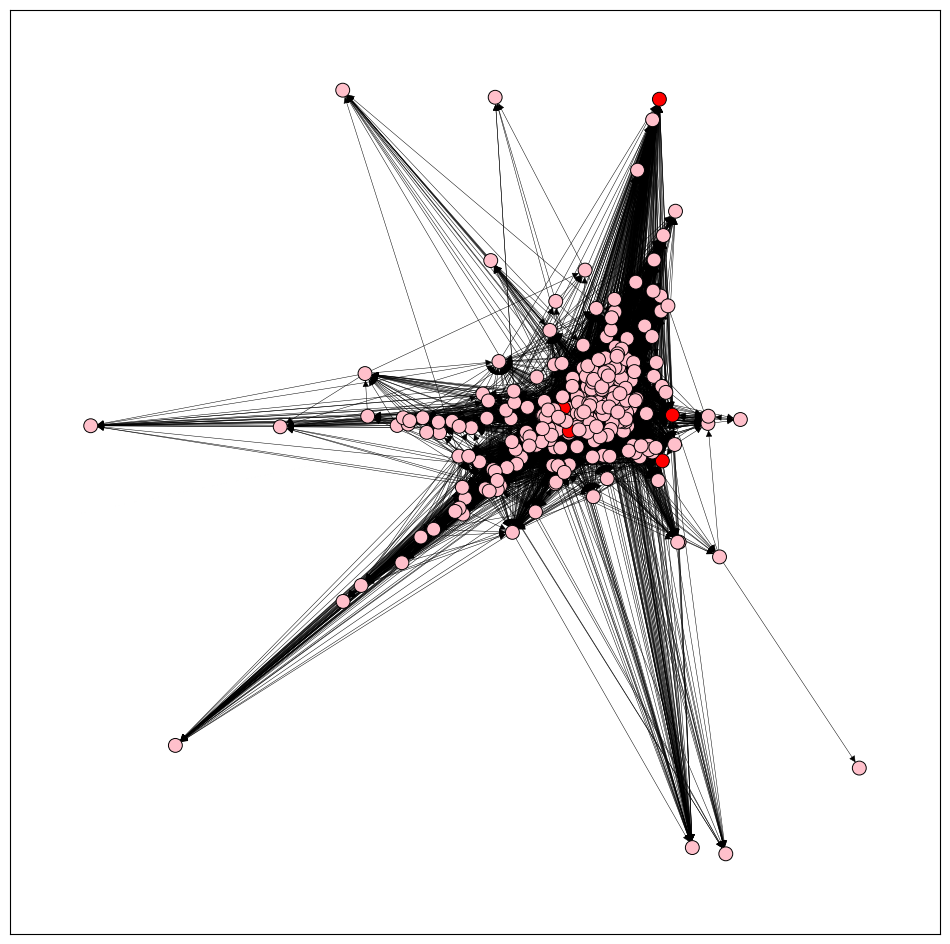

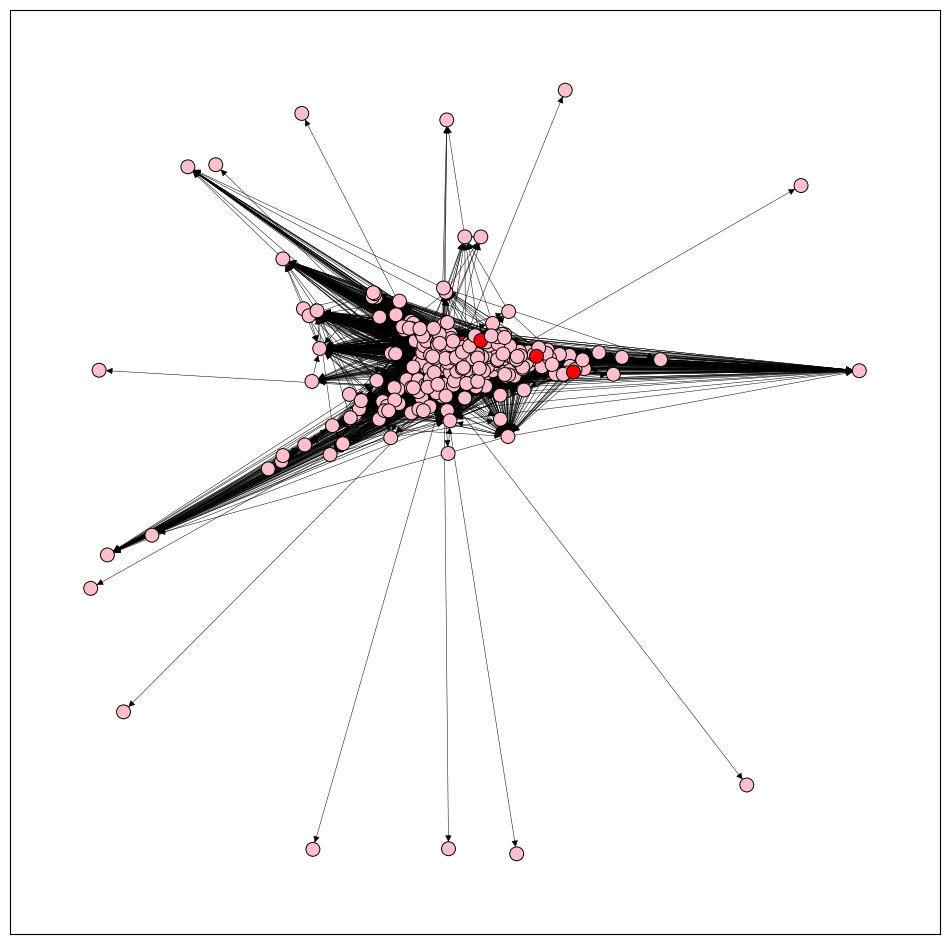

In [64]:
# Influencers of our top 3 communities (5,3,2) in a list
infl_sg5 = list(set(sg5_close + sg5_between))
infl_sg3 = list(set(sg3_close + sg3_between))
infl_sg2 = list(set(sg2_close + sg2_between))

# Coloring influencers in red and rest in pink
color_infl_sg5 = ["red" if node in infl_sg5 else "pink" for node in sg5.nodes]
color_infl_sg3 = ["red" if node in infl_sg3 else "pink" for node in sg3.nodes]
color_infl_sg2 = ["red" if node in infl_sg2 else "pink" for node in sg2.nodes]

# Plotting graphs with influencers
plot_function(graphs, [color_infl_sg5, color_infl_sg3, color_infl_sg2])

#### 11. Designing an action plan:
- a. Use hypothetical business (telecom, marketing agency, etc.)
- b. Use a hypothetical marketing budget
- c. Use a hypothetical cost per action (advertisement cost)
- d. Decide whom should you target? 

##### Hypothetical business (marketing agency)

- In our hypothetical scenario, let's consider a marketing agency introducing a new service and aiming to create awareness and drive subscriptions.

##### Hypothetical Marketing Budget

- As it is marketing agency its primary goal would be to provide marketing services to other existing companies.
- So let's define our marketing agency's budget as $10,000 for the campaign.


##### Cost Per Action (Advertisment Cost)
- The cost per click for the general audience is set at $5, reflecting the more targeted and personalized approach for this campaign. Because after general cost usage we can understand our targeted audience and also influencers, which will help to allocate more resources for the right cause.
- We identified through social network analysis, key influencers in the largest communities (sg5, sg3, sg2). Given the potential reach and influence of these influencers, a more personalized marketing approach can be employed, increasing cost per action for them to $10.

In [69]:
#In our scenario the total influencer cost is 180

Total_Influencer_Cost = (len(infl_sg5) + len(infl_sg3) + len(infl_sg2)) * 10
print(Total_Influencer_Cost)

180


#### Targeting and Budget Allocation

- After accounting for the influencer marketing cost, the remaining budget for targeting the general audience can be calculated like this:

In [72]:
Budget = 10000
Remaining_Budget_General_Audience = Budget - Total_Influencer_Cost
print(Remaining_Budget_General_Audience)

9820


##### Number of General Users Reachable:

- The number of general users the agency can reach in total is calculated based on the remaining budget and general cost per click ($5):

In [77]:
Total_General_Audience = Remaining_Budget_General_Audience / 5
print(f' Number of Genereal users:  {Total_General_Audience}')

 Number of Genereal users:  1964.0


##### Distribution of General Audience

- The general audience is distributed proportionally across the all communities based on their sizes. Larger communities receive a higher proportion of the general audience, ensuring an optimized reach.

##### Implementation and Monitoring

- Finally, the marketing agency should implement this strategy, still closely monitoring key metrics such as new subscriptions, awareness (mentions, shares), and the overall reach of the campaign. Adjustments may be made based on the performance of each community and influencer engagement. This iterative process will ensure that the campaign remains dynamic and responsive to real-time data and user interactions.